In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

In [2]:
import scipy.io
from scipy import optimize

In [3]:
data = scipy.io.loadmat('ex3data1.mat')

In [4]:
features = data['X']
labels = data['y'][:,0]
X = np.insert(data['X'], 0, 1, axis=1)
y = data['y'][:,0]

In [5]:
def show_img(img):
    plt.imshow(img, cmap='gray_r');

[10]


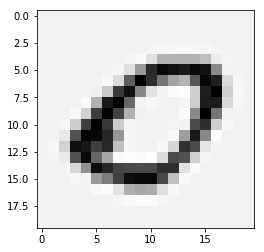

In [6]:
show_img((data['X'][0]).reshape([20,20]));
print(data['y'][0])

[10]


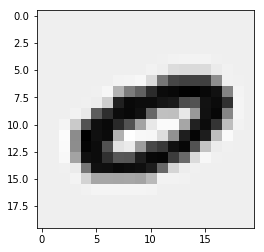

In [7]:
show_img((data['X'][2]).reshape([20,20]));
print(data['y'][2])

## One-vs-all logistic regression model

- $m$: number of samples, here 5000 handwritten digits

**Cost function:**

\begin{equation}
    J(\theta)
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    \left[
        -y^{i} \log( h_{\theta}(x^{(i)}) - (1-y^{(i)}) \log(1-h_{\theta}(x^{(i)})
    \right]
    +
    \frac{\lambda}{2m}
    \sum_{j=1}^{n}
    \theta^{2}_{j}
\end{equation}

**Model:**

\begin{equation}
    h_{\theta}(x^{(i)})
    =
    g(\theta^{T} x^{(i)})
\end{equation}

where $g(z)$ is the sigmoid function:

\begin{equation}
    g(z)
    =
    \frac{1}{1 + e^{-z}}
\end{equation}


\begin{equation}
    X
    =
    \begin{bmatrix}
    -- (x^{1})^{T} -- \\
    -- (x^{2})^{T} -- \\
    ... \\
    -- (x^{m})^{T} --
    \end{bmatrix}
\end{equation}
and
\begin{equation}
    \theta
    =
    \begin{bmatrix}
    \theta_{1} \\
    \theta_{2} \\
    ... \\
    \theta_{m}
    \end{bmatrix}
\end{equation}


**Gradient:**

The $j=0$ component:

\begin{equation}
    \frac{\partial J}{\partial \theta_{j}}
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    \left[
        (
        h_{\theta} (x^{(i)})
        -
        y^{(i)}
        )
        x^{(i)}_{j}
    \right]
\end{equation}

the $j \neq 0$-th component

\begin{equation}
    \frac{\partial J}{\partial \theta_{j}}
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    \left[
        (
        h_{\theta} (x^{(i)})
        -
        y^{(i)}
        )
        x^{(i)}_{j}
    \right]
    +
    \frac{\lambda}{m} \theta_{j}
\end{equation}

Vectorized form:

\begin{equation}
    \underline{\theta}'
    =
    \begin{bmatrix}
        0 \\
        \theta_{1} \\
        \theta_{2} \\
        ... \\
        \theta_{n}
    \end{bmatrix}
\end{equation}

\begin{equation}
    \nabla_{\theta} J
    =
    \frac{1}{m}
    \underline{\underline{X}}^{T}
    (
        \underline{h_{\theta}}(x)
        -
        \underline{y}
    )
    +
    \frac{\lambda}{m}
    \underline{\theta'}
\end{equation}

In [8]:
def sigmoid(z):
    s = 1.0/(1.0+np.exp(-z))
    return s

In [9]:
def hypothesis(theta,X):
    z = X.dot(theta)
    h = sigmoid(z)
    return h

In [10]:
def cost_function(theta, X, y, lam=0):
    m = len(X)
    h = hypothesis(theta,X)
    cost_vector = -y * np.log(h) - (1.0-y)*np.log(1.0 - h)
    regularization_term = np.sum(theta**2) * lam/(2.0*m)
    cost = np.sum(cost_vector)/m + regularization_term
    return cost

In [11]:
def gradient(theta,X,y,lam=0):
    """- X: mxn
       - y: mx1
       - theta: nx1
       - lam: 1"""
    m = len(X)
    h = hypothesis(theta,X)
    thetap = theta
    thetap[0] = 0
    gradient = -(X.transpose().dot(h-y) + lam*thetap)/m
    return gradient

In [12]:
theta = np.random.uniform(high=0.5, size=401)

In [13]:
cost_function(theta,X,y)

-61.483092651460183

In [14]:
gradient(theta,X,y,lam=0.0)

array([  4.50022040e+00,  -0.00000000e+00,  -0.00000000e+00,
         1.02580995e-10,  -2.25881345e-06,  -1.71645362e-05,
         6.47723840e-04,   8.24713737e-04,   3.32509955e-04,
         1.01073735e-04,   1.15225544e-04,   3.41356395e-05,
        -2.55074696e-05,  -6.38745506e-05,  -1.45224951e-04,
        -1.56287827e-04,  -8.80352285e-05,  -2.76174325e-05,
        -1.85479625e-07,   2.92756011e-07,  -0.00000000e+00,
         2.46800120e-07,  -2.48433025e-06,  -5.25195675e-07,
        -4.85221339e-05,  -7.86360804e-05,   1.05316336e-03,
         3.74800995e-03,   5.20836533e-03,   4.02915310e-03,
         1.09538281e-03,  -1.01315152e-03,  -1.56965950e-03,
        -1.70875547e-03,  -1.26922531e-03,  -9.59382204e-04,
        -6.17804433e-04,  -2.62182930e-04,  -1.42062722e-04,
        -4.14625003e-05,  -1.55422288e-05,  -2.11721913e-06,
         2.39477638e-05,  -5.06304697e-05,   2.00629194e-04,
         1.76614348e-03,   9.75211689e-03,   2.17545956e-02,
         2.85706090e-02,

## Single class logistic regression

Train on a specific digit

In [15]:
y = (labels == 2)*1

In [16]:
theta0 = np.random.uniform(high=0.1, size=401)

In [17]:
X

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
h = hypothesis(theta0,X)

In [19]:
h.mean()

0.91650225188053813

In [20]:
g = gradient(theta0,X,y,lam=0)

Minimize a function using a nonlinear conjugate gradient algorithm, `fmin_cg`

In [21]:
lam = 0

In [22]:
theta_opt = optimize.fmin_cg(f=cost_function, fprime=gradient, x0=theta0, args=(X, y, lam))

         Current function value: 2.361063
         Iterations: 0
         Function evaluations: 106
         Gradient evaluations: 94


Nelder-Mead minimization

In [23]:
optim = optimize.minimize(fun=cost_function, x0=theta0, args=(X, y, lam), method='Nelder-Mead')

KeyboardInterrupt: 

In [ ]:
theta_opt = optim.x

In [ ]:
y_predicted = hypothesis(theta_opt,X)

## Test area

In [ ]:
y = (labels == 2)*1

In [ ]:
z = np.dot(X,theta)

In [ ]:
X.shape

In [ ]:
h.shape

In [ ]:
y.shape

In [ ]:
z.shape

In [ ]:
h = 1.0/(1.0 + np.exp(-z))

In [ ]:
X.shape

In [ ]:
theta.shape

In [ ]:
h.shape

In [ ]:
y.shape

In [ ]:
lam = 1.0

In [ ]:
gradient = X.transpose().dot(h-y)

In [ ]:
h.mean()

In [ ]:
cost_vector = -y*np.log(h) - (1.0-y)*np.log(1.0-h)